<a href="https://colab.research.google.com/github/bubuloMallone/NeuralNetworksEX/blob/main/bigram_names.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/bubuloMallone/NeuralNetworksEX/refs/heads/main/datasets/names.txt

words = open('names.txt', 'r').read().splitlines()

words[:10]

--2025-07-02 12:00:30--  https://raw.githubusercontent.com/bubuloMallone/NeuralNetworksEX/refs/heads/main/datasets/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt’

names.txt           100%[===================>] 222.80K  --.-KB/s    in 0.05s   

2025-07-02 12:00:30 (4.40 MB/s) - ‘names.txt’ saved [228145/228145]



['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [2]:
print(len(words))
print(min(len(w) for w in words))
print(max(len(w) for w in words))

32033
2
15


In [5]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1,ch2)
    b[bigram] = b.get(bigram, 0) + 1
    # print(ch1, ch2)

ex = sorted(b.items(), key=lambda kv: -kv[1])
ex[:10]

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963)]

In [11]:
import torch
import matplotlib.pyplot as plt

In [9]:
N = torch.zeros((28,28), dtype=torch.int32)

chars = sorted(list(set(''.join(words))))
stoi = {s:i for i,s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27

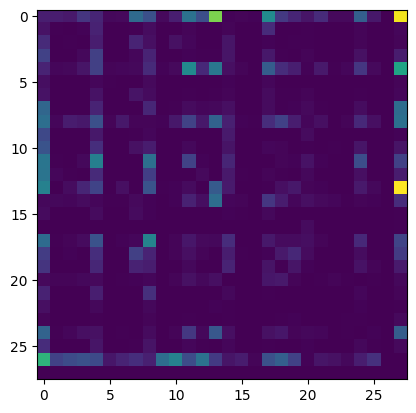

In [14]:
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    idx1 = stoi[ch1]
    idx2 = stoi[ch2]
    N[idx1, idx2] += 1

plt.imshow(N)

In [15]:
len(N)

28

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

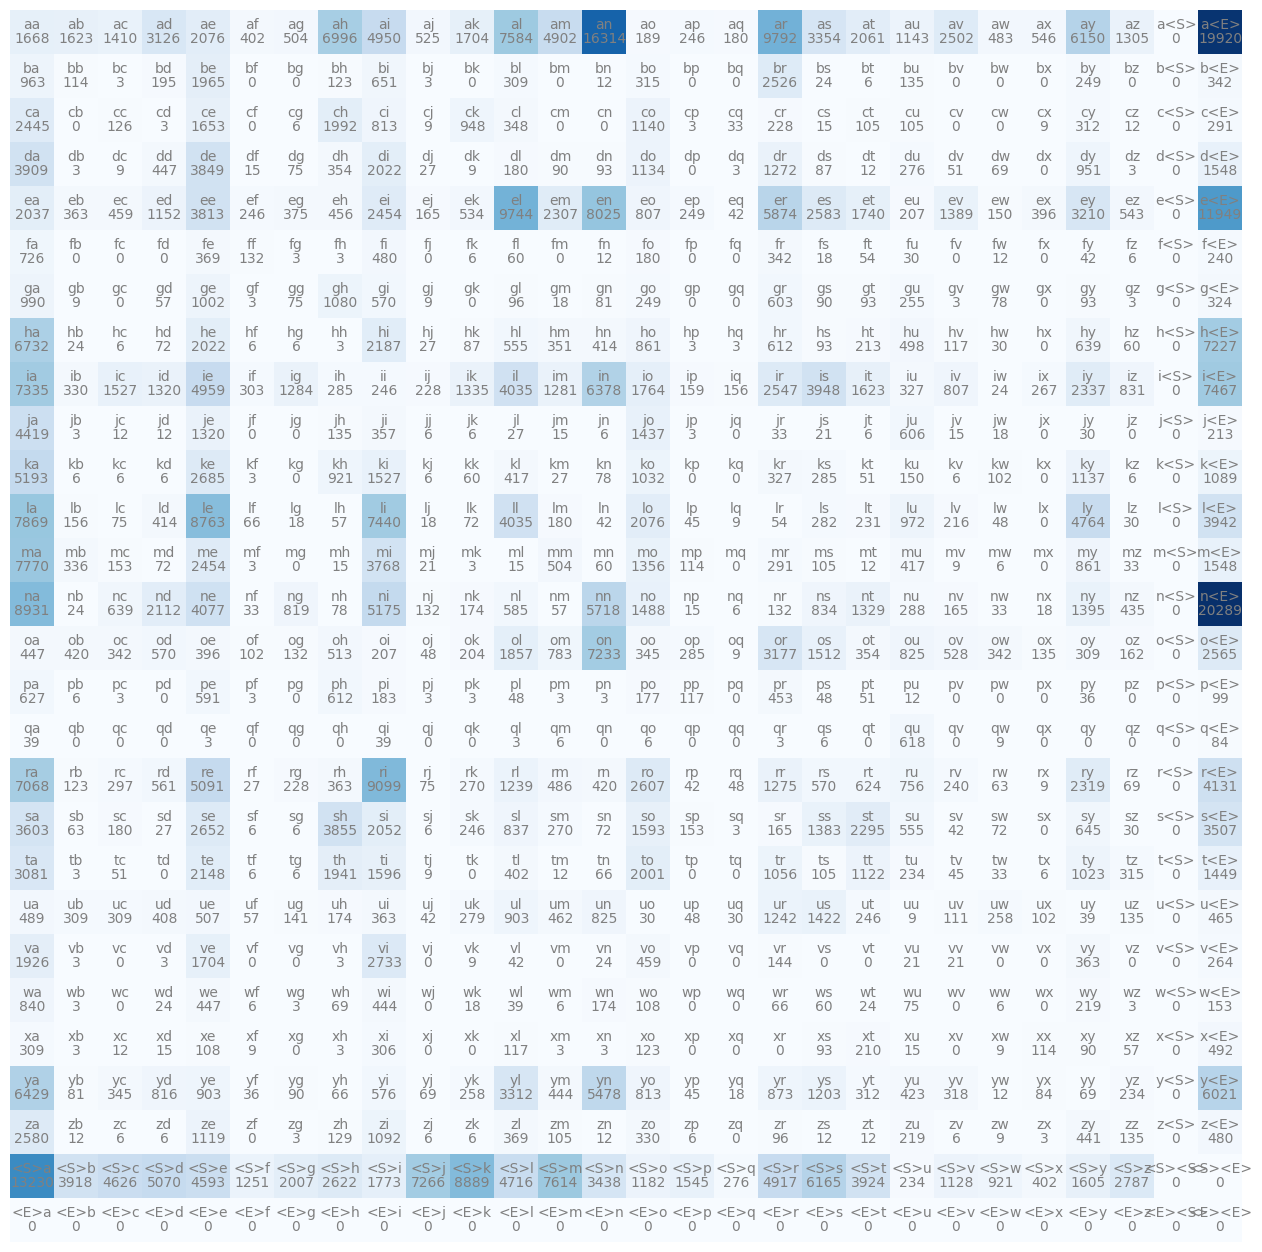

In [16]:
itos = {i:s for s,i in stoi.items()}

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')


for i in range(len(N)):
  for j in range(len(N)):
    chstr = itos[i] + itos[j]
    plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
    plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')

plt.axis('off')

what about using a single special character

In [ ]:
N = torch.zeros((27,27), dtype=torch.int32)

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}